<a href="https://colab.research.google.com/github/Sarthak2578/remote-work-analysis/blob/main/Remote_Working_Survey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"sarthakwaliwadekar","key":"4eb0505a3e212c3ef12e521d1878a18c"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d melodyyiphoiching/remote-working-survey

remote-working-survey.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
from zipfile import ZipFile
file_name = 'remote-working-survey.zip'
with ZipFile(file_name, 'r') as Zip:
  Zip.extractall()

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from scipy import stats
import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
df = pd.read_csv('2020_rws.csv', encoding='unicode_escape')

In [ ]:
df.head()

,Response ID,What year were you born?,What is your gender?,Which of the following best describes your industry?,Which of the following best describes your industry? (Detailed),Which of the following best describes your current occupation?,Which of the following best describes your current occupation? (Detailed),How many people are currently employed by your organisation?,Do you manage people as part of your current occupation?,Which of the following best describes your household?,...,Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - Managing my family responsibilities ; My working relationships ; Preparing for work and commuting ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing,Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - The number of hours I work ; My work-life balance ; My on-the-job learning opportunities ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employers workplace. Select the best aspect of remote working for you - Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing ; My daily expenses ; My personal relationships ; My job satisfaction,Compare remote working to working at your employers workplace. Select the worst aspect of remote working for you - Managing my personal commitments ; My opportunities to socialise ; My mental wellbeing ; My daily expenses ; My personal relationships ; My job satisfaction
0,1,1972,Female,Manufacturing,Food Product Manufacturing,Clerical and administrative,Other Clerical and Administrative,Between 20 and 199,No,Couple with no dependent children,...,Managing my personal commitments,My opportunities to socialise,Preparing for work and commuting,My working relationships,Managing my personal commitments,The number of hours I work,My job satisfaction,The number of hours I work,Managing my personal commitments,My opportunities to socialise
1,2,1972,Male,Wholesale Trade,Other Goods Wholesaling,Managers,"Chief Executives, General Managers and Legisla...",Between 1 and 4,Yes,Couple with dependent children,...,Preparing for work

In [ ]:
df.shape

(1507, 73)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507 entries, 0 to 1506
Data columns (total 73 columns):
 #   Column                                                                                                                                                                                                                                                                                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                                                                                                                                                                                                                                                                                              --------------  -----  
 0   Response ID                                           

In [ ]:
df = df.drop(['Which of the following best describes your industry? (Detailed)', 'Which of the following best describes your current occupation? (Detailed)'], axis=1)

Shortlisting Columns

In [ ]:
column_index_to_keep = 17

df_RWC = df.iloc[:, :column_index_to_keep + 1]

In [ ]:
df_RWC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507 entries, 0 to 1506
Data columns (total 18 columns):
 #   Column                                                                                                                                                                            Non-Null Count  Dtype 
---  ------                                                                                                                                                                            --------------  ----- 
 0   Response ID                                                                                                                                                                       1507 non-null   int64 
 1   What year were you born?                                                                                                                                                          1507 non-null   int64 
 2   What is your gender?                                            

In [ ]:
new_column_name = ['ID','birth_year','gender','industry', 'occupation', 'no_of_employees', 'manager_?', 'household', 'time_since_join', 'Metro_?', 'RW_time', 'RW_encouragement', 'RW_preparation', 'RW_freq', 'RW_perm', 'RW_colab', 'RW_recommend', 'RW_timepref_ly']

In [ ]:
df_RWC.columns = new_column_name

In [ ]:
df_RWC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1507 entries, 0 to 1506
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1507 non-null   int64 
 1   birth_year        1507 non-null   int64 
 2   gender            1507 non-null   object
 3   industry          1507 non-null   object
 4   occupation        1507 non-null   object
 5   no_of_employees   1507 non-null   object
 6   manager_?         1371 non-null   object
 7   household         1507 non-null   object
 8   time_since_join   1507 non-null   object
 9   Metro_?           1507 non-null   object
 10  RW_time           1507 non-null   object
 11  RW_encouragement  1257 non-null   object
 12  RW_preparation    1257 non-null   object
 13  RW_freq           1257 non-null   object
 14  RW_perm           1257 non-null   object
 15  RW_colab          1257 non-null   object
 16  RW_recommend      1257 non-null   object
 17  RW_timepref_ly

In [ ]:
df_RWC.head()

,ID,birth_year,gender,industry,occupation,no_of_employees,manager_?,household,time_since_join,Metro_?,RW_time,RW_encouragement,RW_preparation,RW_freq,RW_perm,RW_colab,RW_recommend,RW_timepref_ly
0,1,1972,Female,Manufacturing,Clerical and administrative,Between 20 and 199,No,Couple with no dependent children,More than 5 years,Regional,Rarely or never,NaN,NaN,NaN,NaN,NaN,NaN,I would not have preferred to work remotely
1,2,1972,Male,Wholesale Trade,Managers,Between 1 and 4,Yes,Couple with dependent children,More than 5 years,Metro,20%,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,20%
2,3,1982,Male,"Electricity, Gas, Water and Waste Services",Managers,More than 200,Yes,One parent family with dependent children,More than 5 years,Metro,60%,Somewhat agree,Somewhat agree,Neither agree nor disagree,Somewhat agree,Neither agree nor disagree,Neither agree nor disagree,50% - About half of my time
3,4,1987,Female,"Professional, Scientific and Technical Services",Professionals,Between 20 and 199,No,Couple with dependent children,Between 1 and 5 years,Metro,20%,Strongly disagree,Somewhat agree,Somewhat disagree,Somewhat disagree,Somewhat agree,Somewhat agree,50% - About half of my time
4,5,1991,Male,"Transport, Postal and Warehousing",Managers,Between 5 and 19,Yes,Couple with no dependent children,More than 5 years,Metro,Less than 10% of my time,Strongly disagree,Somewhat agree,Somewhat disagree,Strongly disagree,Strongly agree,Somewhat agree,60%


In [ ]:
df_RWC.isnull().sum().sum()

1636

In [ ]:
df_RWC.dropna(inplace = True)

In [ ]:
df_RWC.shape

(1139, 18)

In [ ]:
df_RWC.nunique()

ID                  1139
birth_year            48
gender                 2
industry              19
occupation             8
no_of_employees        5
manager_?              2
household              7
time_since_join        3
Metro_?                2
RW_time               11
RW_encouragement       5
RW_preparation         5
RW_freq                5
RW_perm                5
RW_colab               5
RW_recommend           5
RW_timepref_ly        12
dtype: int64

In [ ]:
df_RWC['RW_time'].unique()

array(['20%', '60%', 'Less than 10% of my time', '80%',
       '100% - I spent all of my time remote working', '40%',
       '50% - I spent about half of my time remote working', '30%', '10%',
       '90%', '70%'], dtype=object)

In [ ]:
rw_time_mapping = {
    'Less than 10% of my time': 0,
    '10%': 10,
    '20%': 20,
    '30%': 30,
    '40%': 40,
    '50% - I spent about half of my time remote working': 50,
    '60%': 60,
    '70%': 70,
    '80%': 80,
    '90%': 90,
    '100% - I spent all of my time remote working': 100}

In [ ]:
df_RWC['RW_time'] = df_RWC['RW_time'].map(rw_time_mapping)

Gender Split

In [ ]:
df_RWC['gender'].value_counts()

Male      659
Female    480
Name: gender, dtype: int64

In [ ]:
rw_time_male = df_RWC[df_RWC['gender'] == 'Male']['RW_time']
rw_time_female = df_RWC[df_RWC['gender'] == 'Female']['RW_time']

t_stat, p_value = stats.ttest_ind(rw_time_male, rw_time_female)

alpha = 0.05

print(f'Test Statistic: {t_stat:.4f}')
print(f'P-value: {p_value:.4f}')

if p_value < alpha:
    print("There is a significant difference in RW_time between genders.")
else:
    print("There is no significant difference in RW_time between genders.")

Test Statistic: -0.4975
P-value: 0.6189
There is no significant difference in RW_time between genders.


Age Analysis

In [ ]:
current_year = datetime.datetime.now().year

df_RWC['age'] = current_year - df_RWC['birth_year']

In [ ]:
df_RWC['age'].value_counts().sort_values()

22      1
86      1
123     2
26      3
23      4
25      6
27      6
68      9
29     11
30     11
31     15
28     16
44     19
32     19
67     22
65     22
49     22
41     22
40     25
64     26
37     26
66     26
56     26
50     27
48     27
42     27
35     27
51     29
39     29
47     29
52     29
60     30
34     30
54     30
61     30
55     31
57     32
46     33
43     33
36     33
45     34
58     34
53     35
62     37
59     37
33     38
63     38
38     40
Name: age, dtype: int64

In [ ]:
df_RWC = df_RWC[df_RWC['age']<=80]

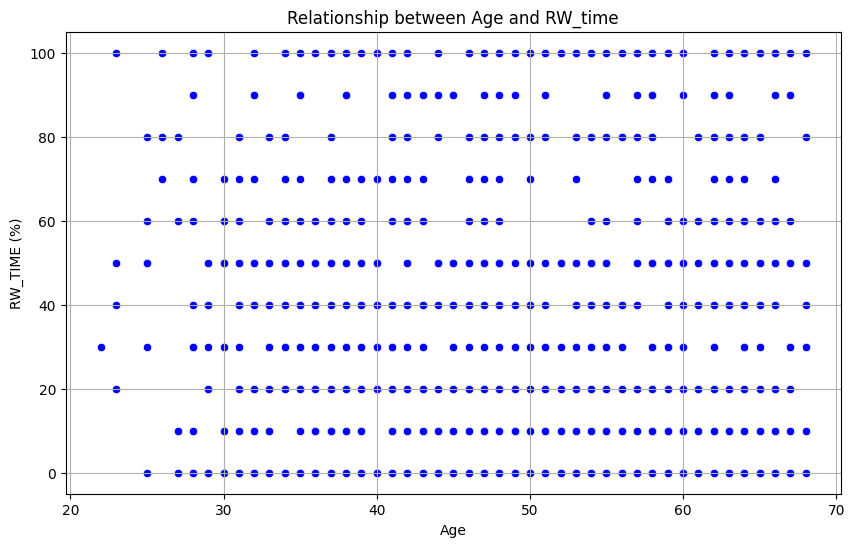

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot(data=df_RWC, x = 'age', y = 'RW_time', marker = 'o', color='blue')
plt.xlabel('Age')
plt.ylabel('RW_TIME (%)')
plt.title('Relationship between Age and RW_time')
plt.grid(True)
plt.show()

In [ ]:
filtered_df1 = df_RWC[df_RWC['RW_time'] > 60]

age_bins = [20, 30, 40, 50, 60, 100]  # Define your desired age bins here, including a bin for ages above 60

filtered_df1['age_slot'] = pd.cut(filtered_df1['age'], bins=age_bins, labels=['20-30', '30-40', '40-50', '50-60', '60+'])
age_counts_above_60 = filtered_df1['age_slot'].value_counts(sort=False)

highest_age_slot_above_60 = age_counts_above_60.idxmax()
highest_age_slot_count_above_60 = age_counts_above_60.max()

print("Number of Data Points in Each Age Slot for 'RW_time_numerical' > 60:")
print(age_counts_above_60)
print(f"The age range with the highest number of 'RW_time_numerical' values above 60 is '{highest_age_slot_above_60}': {highest_age_slot_count_above_60} data points.")

Number of Data Points in Each Age Slot for 'RW_time_numerical' > 60:
20-30    14
30-40    40
40-50    52
50-60    52
60+      43
Name: age_slot, dtype: int64
The age range with the highest number of 'RW_time_numerical' values above 60 is '40-50': 52 data points.


<ipython-input-32-092ea523c165>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df1['age_slot'] = pd.cut(filtered_df1['age'], bins=age_bins, labels=['20-30', '30-40', '40-50', '50-60', '60+'])


Industries & Management

<ipython-input-33-00f0d8e9d36f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_RWC, x='RW_time', y='industry', ci=None)


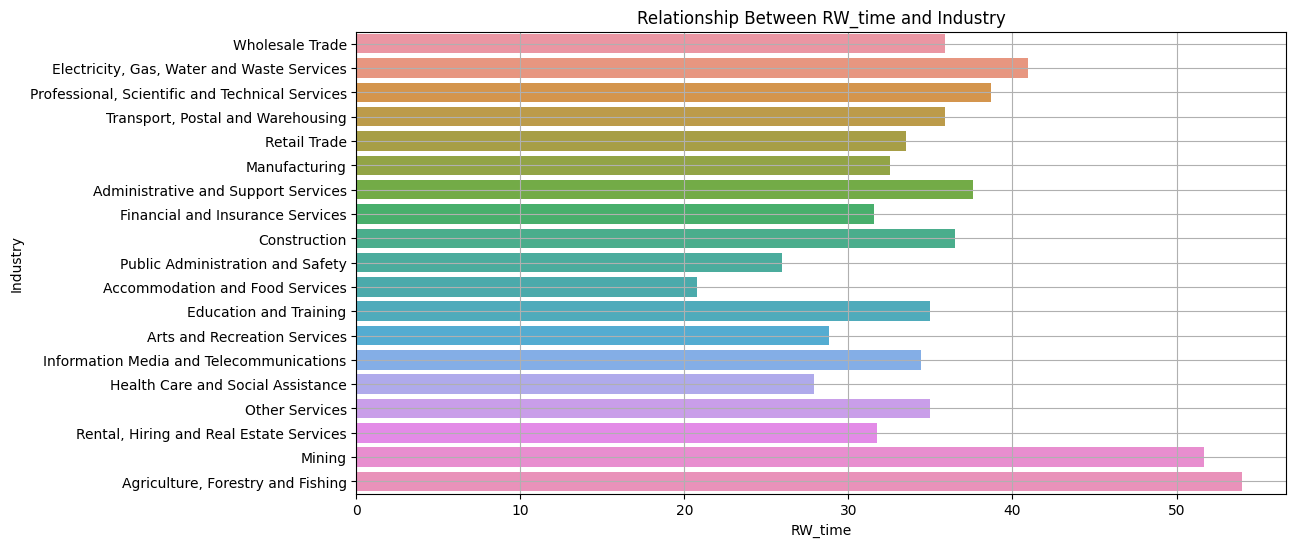

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(data=df_RWC, x='RW_time', y='industry', ci=None)
plt.xlabel('RW_time')
plt.ylabel('Industry')
plt.title('Relationship Between RW_time and Industry')
plt.grid(True)

plt.show()

<ipython-input-34-17927d993651>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_RWC, x='manager_?', y='RW_time', ci=None)


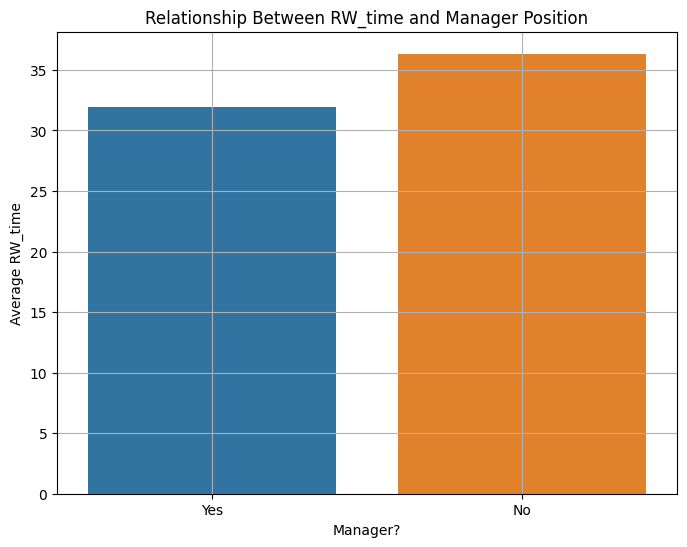

In [ ]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df_RWC, x='manager_?', y='RW_time', ci=None)
plt.xlabel('Manager?')
plt.ylabel('Average RW_time')
plt.title('Relationship Between RW_time and Manager Position')
plt.grid(True)

plt.show()

Household

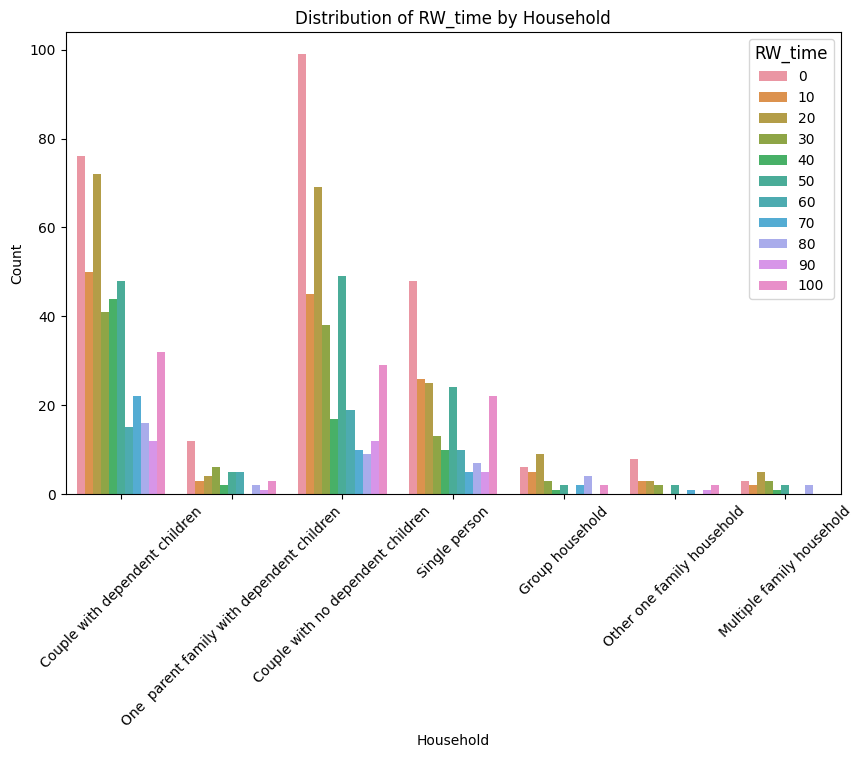

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_RWC, x='household', hue='RW_time')
plt.xlabel('Household')
plt.ylabel('Count')
plt.title('Distribution of RW_time by Household')
plt.xticks(rotation=45)
plt.legend(title='RW_time', title_fontsize='12')
plt.show()

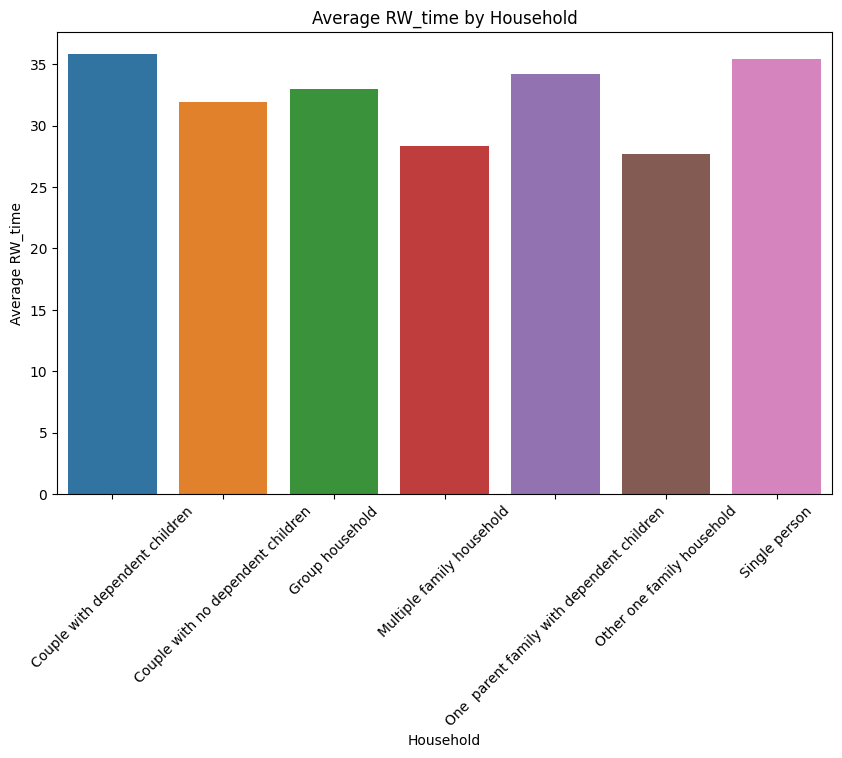

In [ ]:
average_rw_time_by_household = df_RWC.groupby('household')['RW_time'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=average_rw_time_by_household, x='household', y='RW_time')
plt.xlabel('Household')
plt.ylabel('Average RW_time')
plt.title('Average RW_time by Household')
plt.xticks(rotation=45)

plt.show()

Linear Regression Model

In [ ]:
features = ['age', 'gender', 'industry', 'occupation', 'no_of_employees', 'manager_?', 'household']

target = 'RW_time'

X = df_RWC[features]
y = df_RWC[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_features = ['gender', 'industry', 'occupation', 'no_of_employees', 'manager_?', 'household']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[('preprocessor', preprocessor),
                       ('regressor', LinearRegression())])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 924.47
Mean Absolute Error (MAE): 24.68
R-squared (R²): 0.03


In [ ]:
features = ['age', 'gender', 'industry', 'occupation', 'no_of_employees', 'manager_?', 'household']
target = 'RW_time'

X = df_RWC[features]
y = df_RWC[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

categorical_features = ['gender', 'industry', 'occupation', 'no_of_employees', 'manager_?', 'household']
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

model = Pipeline(steps=[('preprocessor', preprocessor),
                       ('regressor', LinearRegression())])

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

categorical_encoder = model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']
encoded_categories = categorical_encoder.get_feature_names_out(input_features=categorical_features)

coefficients = model.named_steps['regressor'].coef_
print("Model Coefficients (Feature Importance):")
for feature, coef in zip(features + list(encoded_categories), coefficients):
    print(f"{feature}: {coef:.2f}")

print("\nConclusions:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")
print("The model's performance indicates that while some features are statistically significant, the model doesn't explain the entire variance in 'RW_time'. Further exploration is needed.")


Model Coefficients (Feature Importance):
age: -0.49
gender: 0.49
industry: -11.81
occupation: 5.43
no_of_employees: 19.97
manager_?: -10.54
household: -3.13
gender_Female: -0.04
gender_Male: 11.09
industry_Accommodation and Food Services: -3.13
industry_Administrative and Support Services: -5.35
industry_Agriculture, Forestry and Fishing: 0.16
industry_Arts and Recreation Services: -0.83
industry_Construction: 16.73
industry_Education and Training: -1.63
industry_Electricity, Gas, Water and Waste Services: 1.22
industry_Financial and Insurance Services: -5.76
industry_Health Care and Social Assistance: -3.50
industry_Information Media and Telecommunications: -5.81
industry_Manufacturing: -0.24
industry_Mining: -2.82
industry_Other Services: -5.46
industry_Professional, Scientific and Technical Services: -0.64
industry_Public Administration and Safety: 3.63
industry_Rental, Hiring and Real Estate Services: 20.09
industry_Retail Trade: -4.34
industry_Transport, Postal and Warehousing: -3

Decision Tree

Decision Tree Regression Results:
Mean Squared Error (MSE): 1713.27
Mean Absolute Error (MAE): 31.07
R-squared (R²): -0.79


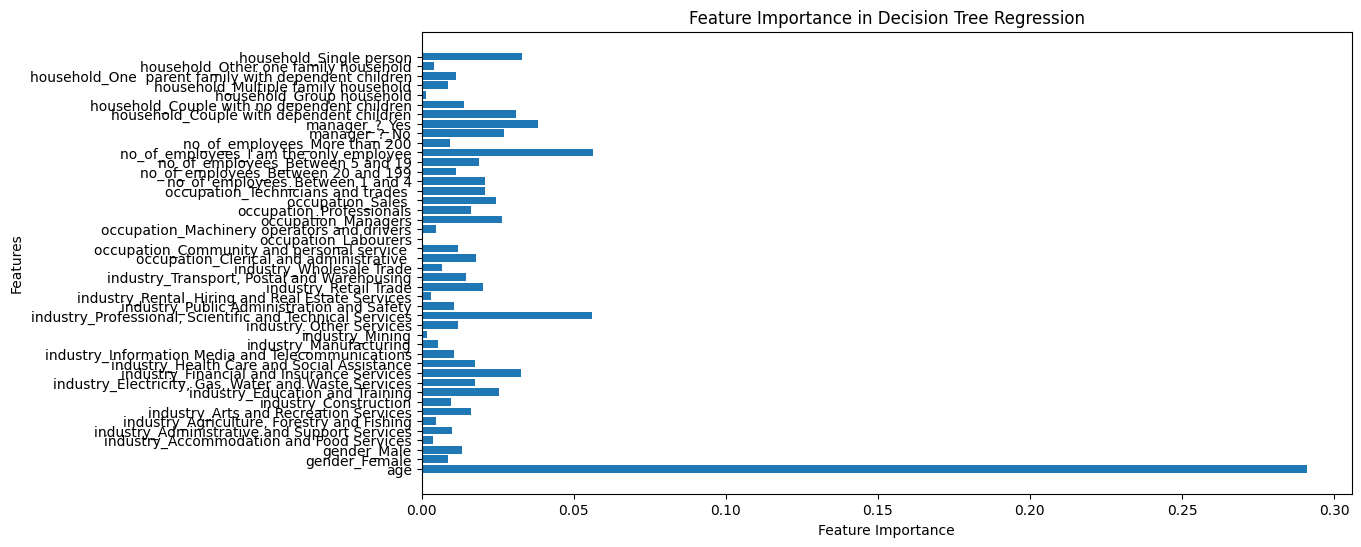

In [ ]:
from sklearn.tree import DecisionTreeRegressor

X = df_RWC[features]
y = df_RWC[target]

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

from sklearn.tree import export_graphviz
export_graphviz(model, out_file='decision_tree.dot', feature_names=X.columns)

print("Decision Tree Regression Results:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

feature_importances = model.feature_importances_
plt.figure(figsize=(12, 6))
plt.barh(X.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance in Decision Tree Regression')
plt.show()